In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd




In [49]:
df=pd.read_csv('/home/aims/Downloads/ammi-ghana-bootcamp-kaggle-competition(1)/train.csv')
test=pd.read_csv('/home/aims/Downloads/ammi-ghana-bootcamp-kaggle-competition(1)/test.csv')
df['lenDes']=df['description'].apply(len)
test['lenDes']=df['description'].apply(len)
#test['id']
#df['id']


In [50]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,lenDes
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027,267
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079,225
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440,199
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405,187
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649,290


In [51]:
test

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,lenDes
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0,267
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1,225
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2,199
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3,187
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4,290
5,91222,US,"An easy, gentle red wine, full-bodied and spic...",NaN,86.118662,NaN,California,Russian River Valley,Sonoma,NaN,NaN,Bearboat 2008 Syrah (Russian River Valley),SYRAH,Bearboat,5,185
6,126792,Argentina,Red berry fruit with touches of vanilla and sp...,Saurus Patagonia,86.054011,NaN,Other,Neuquén,NaN,NaN,NaN,NaN,PINOT NOIR,Familia Schroeder,6,201
7,50588,US,"Tart, dry and simple, this Cab will happily wa...",NaN,82.964697,NaN,California,California,California Other,NaN,NaN,Montevina 2006 Cabernet Sauvignon (California),CABERNET SAUVIGNON,Montevina,7,278
8,145901,Italy,"A gorgeous and opulent nose with honey, vanill...",NaN,88.950953,NaN,Northeastern Italy,Trentino,NaN,NaN,NaN,NaN,PINOT GRIGIO,Bollini,8,178
9,124649,Italy,"Pressed violet, baked plum, baking spice and c...",NaN,90.167277,NaN,Veneto,Amarone della Valpolicella Classico,NaN,Kerin O’Keefe,@kerinokeefe,David Sterza 2011 Amarone della Valpolicella ...,RED BLEND,David Sterza,9,202


In [52]:
df.describe()

,points,price,id,lenDes
count,175000.000000,175000.000000,175000.000000,175000.000000
mean,88.083987,34.304400,70684.047240,243.566040
std,3.157001,38.398146,41341.638798,68.173749
min,79.636128,4.000000,1.000000,17.000000
25%,85.971283,16.000000,35020.000000,197.000000
50%,87.981631,25.000000,70256.500000,239.000000
75%,90.085631,40.000000,105550.250000,284.000000
max,100.220603,2500.000000,150929.000000,829.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 15 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
lenDes                   175000 non-null int64
dtypes: float64(2), int64(2), object(11)
memory usage: 20.0+ MB


In [54]:
df['country'].value_counts().head(5)

US        79129
Italy     24194
France    22060
Spain      9993
Chile      6893
Name: country, dtype: int64

In [55]:
df.groupby('country').mean()['price']

country
Argentina                 22.456587
Armenia                   14.500000
Australia                 32.185269
Austria                   31.301026
Bosnia and Herzegovina    12.500000
Brazil                    22.551724
Bulgaria                  13.136986
Canada                    35.123377
Chile                     20.174960
China                     17.333333
Croatia                   24.479592
Cyprus                    15.034483
Czech Republic            25.250000
England                   51.574074
France                    43.367316
Georgia                   19.364706
Germany                   40.280000
Greece                    21.949059
Hungary                   43.901961
India                     13.428571
Israel                    32.243466
Italy                     38.804166
Japan                     24.000000
Lebanon                   30.540000
Lithuania                 10.000000
Luxembourg                31.250000
Macedonia                 15.611111
Mexico              

In [56]:
train_features=df[['points', 'lenDes']]
test_features=test[['points', 'lenDes']]
test_label=test['price']




In [57]:
train_features=df[['points', 'lenDes']]
test_features=test[['points', 'lenDes']]
test_label=test['price']

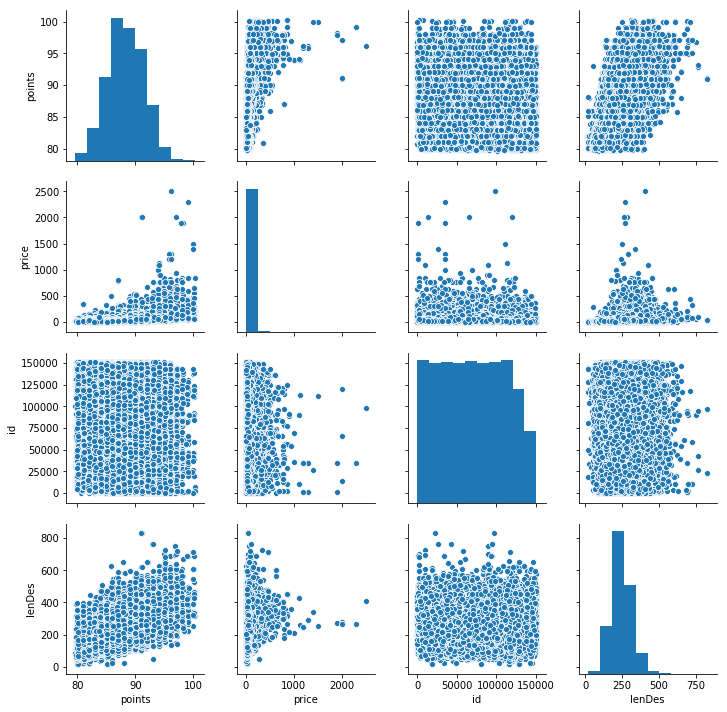

In [58]:
sns.pairplot(df)

In [ ]:
train_label=df['price']


In [ ]:
# Instantiate model with 1000 decision trees

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data


In [ ]:
rf.fit(train_features, train_label);


In [ ]:
rf.estimators_

In [ ]:
rf.estimator_params

In [ ]:
price=rf.predict(test_features)


In [ ]:
price

In [ ]:
print(price)

In [ ]:
test['price']=price

In [ ]:
test

In [ ]:
pred=test[['id', 'price']]

pred.columns
pred.to_csv('/home/aims/Downloads/ammi-ghana-bootcamp-kaggle-competition(1)/G 8_prediction1.csv')

In [ ]:
pred.columns

In [ ]:
from sklearn.metrics import accuracy_score

# Next step: analyse the variable description and varity

In [ ]:
tfidf = TfidfVectorizer(min_df=20,
                        ngram_range=(1, 1),
                        norm='l2',stop_words='english',
max_features=5000)

In [ ]:
desTok=tfidf.fit(df['description'])

In [ ]:
X = tfidf.fit_transform(df['description'])


In [ ]:
X.data

In [ ]:
np.shape(X)

In [ ]:
df['description']=X.data

In [ ]:
l=[]
for i in range(len(df['variety'])):
    a=df['variety'][i]
    if type(a)==str:
        
        l.append(a.split(' '))